# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# The dataset collected is related to 17 marketing campaigns. These campaigns occurred between May 2008 and November 2010, and represented a total of 79,354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# Read in the Data
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import time

# Read and clean the data 
print("Loading and cleaning the data...")
bank_marketing = pd.read_csv('bank-additional-full.csv', delimiter=';')
bank_marketing.columns = bank_marketing.columns.str.replace('"', '').str.strip()
bank_marketing.head()

Loading and cleaning the data...


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [2]:
# Understand the features - print basic info
print("Understand the features, basic info below")

print(bank_marketing.info())
print(bank_marketing.describe())
print(bank_marketing.head())

Understand the features, basic info below
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  fl

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [3]:
# The business objective of this task is compare different classifiers in order to develop the best predictive model
# to determine the likely outcome of the bank's marketing campaigns, and use the insights gleaned (i.e the relative 
# importance of certain features such as "duration") to enhance the effectiveness of future campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Preprocessing the data...


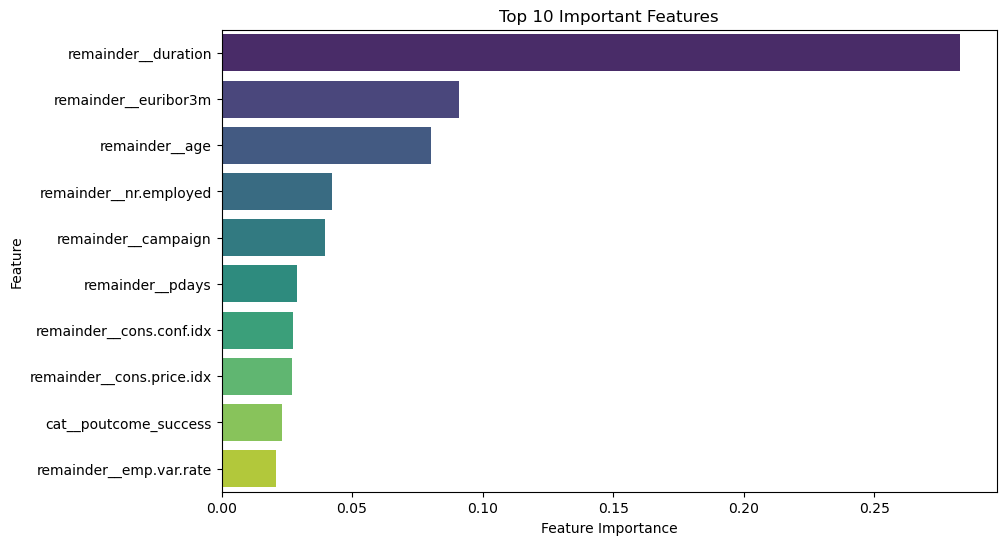

In [4]:
# Prepare features and target for modeling with appropriate encoding and transformations
print("Preprocessing the data...")

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
    ], remainder='passthrough')

X = bank_marketing.drop(columns=['y'])
y = LabelEncoder().fit_transform(bank_marketing['y'])

# Lets explore the features in a little more detail

# Encode the target variable
y = LabelEncoder().fit_transform(bank_marketing['y'])

# Define categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Preprocessing pipeline: One-hot encode categorical features and leave numerical features as is
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

# Build the model pipeline with a RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
# Fit the model
X = bank_marketing.drop(columns=['y'])
pipeline.fit(X, y)

# Get feature importances from the trained RandomForest model
model = pipeline.named_steps['classifier']
importances = model.feature_importances_

# Get feature names after one-hot encoding
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
all_feature_names = list(feature_names)

# Create a DataFrame to rank feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Save the plot as a PNG file
plt.savefig('top_10_feature_importance.png')

# Show the plot
plt.show()


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [5]:
# Train/test split
print("Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting the data into training and testing sets...


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [6]:
# The baseline model - Establish baseline performance
print("Establish the baseline performance")
baseline_accuracy = max(y.mean(), 1 - y.mean())
print(f"Baseline Accuracy: {baseline_accuracy}")


Establish the baseline performance
Baseline Accuracy: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [7]:
# A Simple Model - Logistic Regression
print("Training Logistic Regression model...")
log_reg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=500))])
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

Training Logistic Regression model...


### Problem 9: Score the Model

What is the accuracy of your model?

In [8]:
# Score the Logistic Regression model – what is the accuracy of this model
print("Score the accuracy of the logistic regression model...")
train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)
print(f"Logistic Regression - Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Score the accuracy of the logistic regression model...
Logistic Regression - Train Accuracy: 0.9102579666160849, Test Accuracy: 0.9109007040543822


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Comparing multiple models...

Model Comparison Results:
              Model  Train Time (seconds)  Train Accuracy  Test Accuracy
Logistic Regression                2.5484          0.9103         0.9109
      Decision Tree                0.2454          0.9318         0.9076
                KNN                0.0403          0.9321         0.9020
                SVM              109.6158          0.8985         0.8946


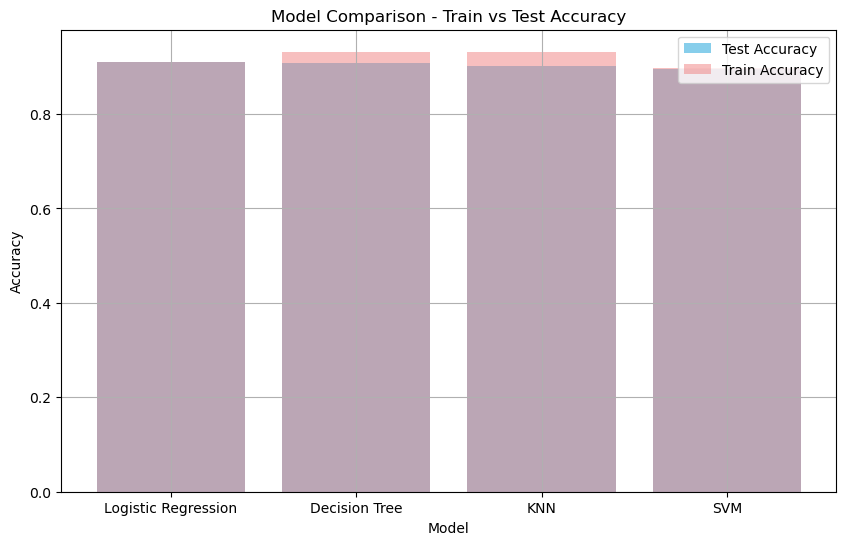

In [9]:
# Model Comparisons
print("Comparing multiple models...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10),  # Limiting depth to prevent overfitting
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

results = []
for name, model in models.items():
    start_time = time.time()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)
    end_time = time.time()
    
    train_acc = pipe.score(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)
    results.append({
        'Model': name,
        'Train Time (seconds)': round(end_time - start_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a tabular format
print("\nModel Comparison Results:")
print(results_df.to_string(index=False))

# Plot the results with switched axes
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Test Accuracy'], color='skyblue', label='Test Accuracy')
plt.bar(results_df['Model'], results_df['Train Accuracy'], color='lightcoral', alpha=0.5, label='Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Comparison - Train vs Test Accuracy')
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('model_comparison.png')

# Show the plot
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Improving the models with hyperparameter tuning...
Hyperparameter tuning for Logistic Regression...
Hyperparameter tuning for Decision Tree...
Hyperparameter tuning for KNN...
Hyperparameter tuning for SVM...

Model Performance Results:
              Model  Train Time (seconds)  Train Accuracy  Test Accuracy
Logistic Regression                7.9061          0.9103         0.9109
      Decision Tree                1.6952          0.9172         0.9153
                KNN                3.4686          0.9218         0.9090
                SVM              436.5480          0.8862         0.8872

Best Parameters for Each Model:
Logistic Regression:
classifier__C: 1
classifier__max_iter: 3000
classifier__solver: lbfgs

Decision Tree:
classifier__max_depth: 5
classifier__min_samples_leaf: 10
classifier__min_samples_split: 10

KNN:
classifier__metric: euclidean
classifier__n_neighbors: 11
classifier__weights: uniform

SVM:
classifier__C: 1
classifier__gamma: 0.01
classifier__kernel: linear

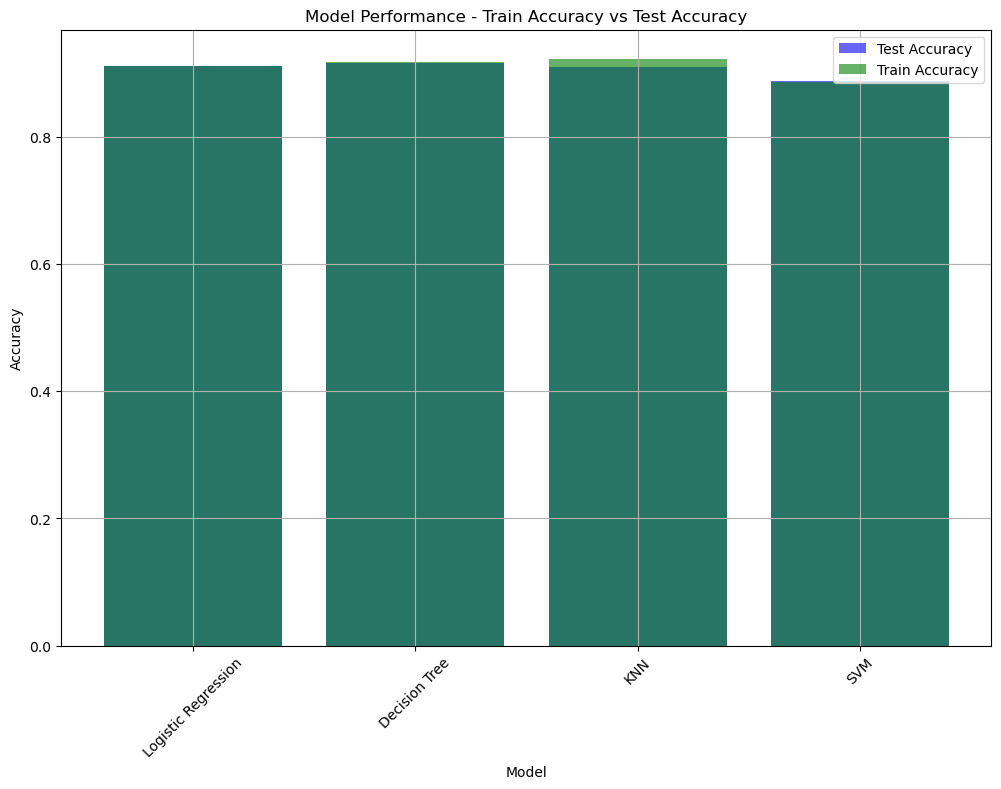

In [10]:
# Improving the Model - Hyperparameter tuning
print("Improving the models with hyperparameter tuning...")

# Define parameter grids specific to each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1],
        'classifier__solver': ['lbfgs'],  # Change solver to 'lbfgs'
        'classifier__max_iter': [3000]   # Further increase max_iter
    },
    'Decision Tree': {'classifier__max_depth': [5, 10, 15], 
                      'classifier__min_samples_split': [10, 20], 
                      'classifier__min_samples_leaf': [5, 10]},
    'KNN': {'classifier__n_neighbors': [5, 11], 
            'classifier__weights': ['uniform', 'distance'], 
            'classifier__metric': ['euclidean']},
    'SVM': {'classifier__C': [0.1, 1], 
            'classifier__gamma': [0.01], 
            'classifier__kernel': ['linear']}
}

tuned_results = []
performance_results = []

# Loop through each model and apply the corresponding parameter grid
for name, model in models.items():
    if name in param_grids:
        param_grid = param_grids[name]
        
        # Use GridSearchCV for all models
        search = GridSearchCV(Pipeline([('preprocessor', preprocessor), ('classifier', model)]), 
                              param_grid, cv=3, n_jobs=-1, scoring='accuracy')
        
        print(f"Hyperparameter tuning for {name}...")
        start_time = time.time()
        search.fit(X_train, y_train)
        end_time = time.time()
        
        best_params = search.best_params_
        best_score = search.best_score_
        test_acc = search.score(X_test, y_test)
        train_acc = search.score(X_train, y_train)
        tuning_time = round(end_time - start_time, 4)

        # Format best parameters for better readability
        formatted_params = "\n".join([f"{key}: {value}" for key, value in best_params.items()])
        
        tuned_results.append({
            'Model': name,
            'Best Params': formatted_params,
            'Best CV Score': round(best_score, 4),
            'Test Accuracy': round(test_acc, 4),
            'Tuning Time (seconds)': tuning_time
        })

        performance_results.append({
            'Model': name,
            'Train Time (seconds)': tuning_time,
            'Train Accuracy': round(train_acc, 4),
            'Test Accuracy': round(test_acc, 4)
        })

# Convert the results to DataFrames
tuned_results_df = pd.DataFrame(tuned_results)
performance_results_df = pd.DataFrame(performance_results)

# Display the performance results in a tabular format
print("\nModel Performance Results:")
print(performance_results_df.to_string(index=False))

# Display the best parameters for each model
print("\nBest Parameters for Each Model:")
for index, row in tuned_results_df.iterrows():
    print(f"{row['Model']}:\n{row['Best Params']}\n")

# Plot the performance results
plt.figure(figsize=(12, 8))
plt.bar(performance_results_df['Model'], performance_results_df['Test Accuracy'], color='b', alpha=0.6, label='Test Accuracy')
plt.bar(performance_results_df['Model'], performance_results_df['Train Accuracy'], color='g', alpha=0.6, label='Train Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance - Train Accuracy vs Test Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('model_performance_comparison.png')

# Show the plot
plt.show()

# Note - there is no gender feature in this dataset. See the plot in section 5 for the top 10 most important features.


##### Questions

In [ ]:
# One thing missing from this dataset is the counterfactual. 
# The provided dataset only includes those candidates that were contacted via a marketing campaign.
# It would be important to understand the details of clients who did take out a loan, but were not touched by the 
# marketing efforts. The efficiency of the various models would have to be compared/adjusted after comparing 
# the incremental improvement in loan conversion due to the various marking campaigns.